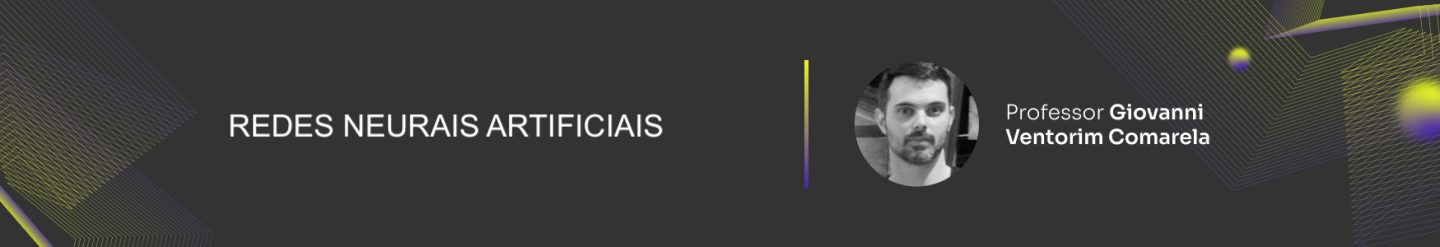

# MLP - Treinamento - Questões Experimentais e Conceitos Importantes

Na aula passada, vimos uma série de desafios relacionados ao treinamento de um bom modelo baseado em redes neurais, mais especificamente, MLPs.

Nesta aula, veremos definições de conceitos e técnicas importantes para contornar alguns desses desafios.

O foco da aula será no clássico e recorrente problema de *overfitting*, i.e., um modelo especializado nos dados de treinamento e incapaz de generalizar para dados novos. No entanto, o que veremos hoje também está relacionado com outros desafios/problemas, por exemplo:
1. Mínimos locais, i.e., convergência do SGD para um modelo não ótimo;
2. Eficiência no treinamento, i.e., alto tempo de treinamento;
3. *Underfitting*, i.e., um modelo muito simples para padrões complexos;



No restante da aula, vamos assumir que estamos interessados em treinar uma MLP, cuja a arquitetura já foi definida. Em outras palavras, o número de camadas, o número de unidades por camada e as funções de ativação são fixos e conhecidos.

Além disso, vamos supor que para o treinamento do modelo está disponível um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i = 1}^n$, com $\mathbf{x}_i \in \mathbb{R}^d$. Como já discutido em aulas anteriores, a configuração dos $y_i$'s depende da tarefa alvo (regressão ou classificação), ou seja, cada $y_i$ pode ser um valor (ou vetor de valores) real ou discreto.

Por fim, para simplificar a apresentação e a notação, vamos supor que todos os parâmetros da MLP (matrizes de pesos e vetores de vieses) são representados por um único vetor de parâmetros. Vamos denotar esse vetor por $\mathbf{\theta}$.

Em resumo, hoje vamos discutir conceitos e técnicas importantes para se obter um bom vetor de parâmetros $\mathbf{\theta}$ a partir de um conjunto de treinamento $D$.

## Épocas

Um conceito muito importante no treinamento de uma rede neural é o conceito de época. Vamos apresentá-lo utilizando o contexto do algoritmo SGD (Descida do Gradiente Estocástica). No entanto, o conceito ainda é válido para outros algoritmos de otimização comumente utilizados.

O SGD, como visto em aulas passadas, pode ser escrito da seguinte maneira para o contexto da aula de hoje:


1. $m \leftarrow 0$
2. Comece com uma estimativa de parâmetro inicial $\mathbf{\theta}^0$.
3. Para $i \leftarrow 1$ até $n$
4. > $\mathbf{\theta}^{m+1} \leftarrow \mathbf{\theta}^m - \eta \cdot \nabla_\mathbf{\theta}L(y_i, \phi(\mathbf{x}_i; \mathbf{\theta}^m))$
5. > $m \leftarrow m + 1$
6. Se não houve convergência, volte para o Passo (3).


Para relembrar, no algoritmo acima, temos que:
- $\phi(\mathbf{x}_i; \mathbf{\theta}^m)$ é a saída da rede, para a entrada $\mathbf{x}_i$, quando os pesos e vieses da rede são dados pelo vetor $\mathbf{\theta}^m$;
- $L(y_i, \phi(\mathbf{x}_i; \mathbf{\theta}^m))$ é a função de perda, i.e., o "erro" cometido pelo modelo quando comparado a saída esperada (i.e., $y_i$) para a entrada $\mathbf{x}_i$. $L$ pode ser, por exemplo, o Erro Quadrático (em regressão) ou Entropia Cruzada (em classificação).
- $\nabla_\mathbf{\theta}L(y_i, \phi(\mathbf{x}_i; \mathbf{\theta}^m))$ é o gradiente da função de perda computado para a saída do modelo e a saída esperada.
- $\eta$ é a taxa de aprendizado.



Em resumo e como já visto, a ideia do SGD é realizar várias "passadas" pelo conjunto de treinamento. Em cada "passada", itera-se sobre cada elemento do conjunto e realiza-se a atualização dos parâmetros da rede em cada iteração. No caso do algoritmo acima, o algoritmo executa enquanto não houver convergência.

Na prática, esperar que o SGD convirja pode ser um problema. A convergência pode demorar a ocorrer e, pior, pode até não ocorrer em muitos casos. Assim, é comum modificar o algoritmo acima para que ele execute um número fixo de "passadas" pelo conjunto de treinamento. Essa versão modificada fica como a seguir:

1. $m \leftarrow 0$
2. Comece com uma estimativa de parâmetro inicial $\mathbf{\theta}^0$.
3. Para $j \leftarrow 1$ até $N$
4. >Para $i \leftarrow 1$ até $n$
5. >> $\mathbf{\theta}^{m+1} \leftarrow \mathbf{\theta}^m - \eta \cdot \nabla_\mathbf{\theta}L(y_i, \phi(\mathbf{x}_i; \mathbf{\theta}^m))$
6. >> $m \leftarrow m + 1$


No algoritmo acima, serão realizadas exatamente $N$ passadas pelo conjunto de treinamento. Esse valor, $N$, é conhecido na literatura como número de **Épocas** (do inglês, *Epochs*).

O número de épocas tem grande impacto no treinamento de uma MLP.
Um valor pequeno pode gerar uma rede mal treinada e com desempenho ruim. Por outro lado, um valor muito grande para o número de épocas pode gerar *overfitting*. Veremos mais sobre isso no restante dessa aula.

Em ``Keras``, o número de épocas pode ser configurado fazendo uso do parâmetro `epochs`, ao se invocar o método [`fit`](https://keras.io/api/models/model_training_apis/).

## *Batch size*

O SGD, como apresentado acima, realiza a atualização dos parâmetros da rede (vetor $\mathbf{\theta}$) em cada iteração sobre um elemento do conjunto de treinamento.

Na prática, essa granularidade muito fina pode trazer dois problemas:
- demora na convergência; e
- perda de eficiência (uma vez que se perde a oportunidade de executar muitas operaçõe em paralelo).

Em contrapartida, como já argumentado em aulas passadas, atualizar os parâmetros da rede apenas uma vez por Época também é inviável, principalmente para conjuntos de dados muito grandes.

Assim, é comum fazer a atualização dos parâmetros da rede após iterar e computar o gradiente da função de custo com base em um pequeno lote (ou *batch*) de elementos do conjunto de treinamento. O número de elementos desse lote de processamento é conhecido na literatura como *batch size* (i.e., tamanho do lote).

Assim como para o número de Épocas, um *batch size* muito grande ou muito pequeno pode trazer problemas para o treinamento de uma rede neural.

Em ``Keras``, o *batch size* pode ser configurado fazendo uso do parâmetro `batch_size`, ao se invocar o método [`fit`](https://keras.io/api/models/model_training_apis/).

## Gráfico da função de custo

Uma boa prática ao se realizar o treinamento de uma rede neural é observar a evolução da função de custo ao longo das épocas de treinamento.

Para ilustrar o conceito, vamos utilizar um exemplo de conjunto de dados de classificação, o qual é apresentado na Figura abaixo.

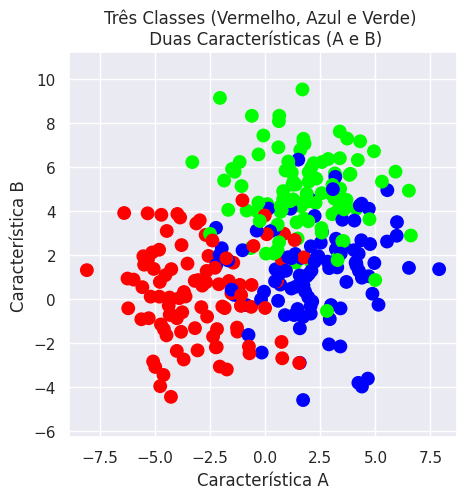

In [ ]:
#@title
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set()

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X, y = sk_data.make_blobs(n_samples=300,
                          centers=[[-3, 0],[2, 5], [2.5, 1.5]],
                          #centers=[[-2, 0],[1, 5], [2.5, 1.5]],
                          cluster_std = [2, 2, 2],
                          #cluster_std = [2, 2, 2],
                          n_features=2,
                          center_box=(-10.0, 10.0),random_state=0)
plt.figure(figsize = (5,5))
plt.axis('equal')
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, s = 80);

plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title('Três Classes (Vermelho, Azul e Verde) \n Duas Características (A e B)');

Como de costume, iniciamos fazendo a divisão em porções de treinamento e teste e fazendo a codificação *one-hot* dos rótulos.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                    random_state = 7)

encoder = keras.layers.CategoryEncoding(num_tokens = 3, output_mode="one_hot")
y_train_encoded = encoder(y_train)

In [ ]:
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((2,)),                                 # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 1
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 2
    keras.layers.Dense(units = 3, activation = "softmax")]    # camada de saída
)

Ao configurar o modelo no código abaixo, estamos informando que queremos registrar o histórico da métrica $F1$-score ao longo das épocas de treinamento. Outras métricas (e.g., acurácia, precisão, revocação, AUC, etc.) também poderiam ser utilizadas.

É **importante ressaltar** que essas métricas são computadas para o **conjunto de treinamento**.

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

Por fim, podemos realizar o treinamento da rede neural. Veja, no código abaixo, que vamos executar um total de 2000 épocas e que estamos usando *batches* de tamanho 32.

Observe que estamos armazenando o retorno do método `fit` em uma variável `history`. Essa variável conterá os valores da função de custo e das demais métricas informadas na configuração do modelo (ao se invocar o método `compile`) ao logo de todas as épocas.

In [ ]:
history = model.fit(X_train, y_train_encoded,  epochs = 2000, verbose = 2, batch_size = 32);

Epoch 1/2000
7/7 - 1s - 172ms/step - f1_score: 0.6485 - loss: 0.8146
Epoch 2/2000
7/7 - 0s - 8ms/step - f1_score: 0.7511 - loss: 0.5814
Epoch 3/2000
7/7 - 0s - 19ms/step - f1_score: 0.7899 - loss: 0.5365
Epoch 4/2000
7/7 - 0s - 8ms/step - f1_score: 0.7939 - loss: 0.5108
Epoch 5/2000
7/7 - 0s - 9ms/step - f1_score: 0.7848 - loss: 0.5067
Epoch 6/2000
7/7 - 0s - 20ms/step - f1_score: 0.7998 - loss: 0.4899
Epoch 7/2000
7/7 - 0s - 8ms/step - f1_score: 0.7990 - loss: 0.4962
Epoch 8/2000
7/7 - 0s - 20ms/step - f1_score: 0.7992 - loss: 0.4867
Epoch 9/2000
7/7 - 0s - 8ms/step - f1_score: 0.8046 - loss: 0.4858
Epoch 10/2000
7/7 - 0s - 20ms/step - f1_score: 0.8052 - loss: 0.4746
Epoch 11/2000
7/7 - 0s - 9ms/step - f1_score: 0.7801 - loss: 0.4940
Epoch 12/2000
7/7 - 0s - 19ms/step - f1_score: 0.7992 - loss: 0.4679
Epoch 13/2000
7/7 - 0s - 8ms/step - f1_score: 0.8089 - loss: 0.4692
Epoch 14/2000
7/7 - 0s - 9ms/step - f1_score: 0.8142 - loss: 0.4640
Epoch 15/2000
7/7 - 0s - 8ms/step - f1_score: 0.80

Após realizar o treinamento, podemos analisar o comportamento da função de custo e da métrica $F1$-score. Uma boa prática para essa análise é fazer um gráfico como o mostrado abaixo.

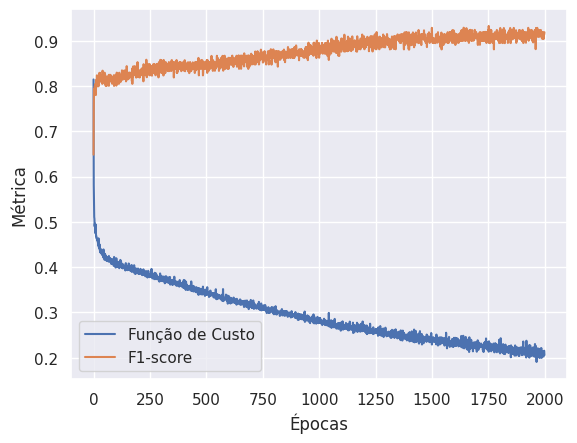

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(history.history['loss'], label = 'Função de Custo')
plt.plot(history.history['f1_score'], label = 'F1-score')
plt.xlabel('Épocas')
plt.ylabel(r'Métrica');
plt.legend(loc = 'best');

Pela figura acima, pode-se observar que à medida que a rede é treinada o valor da função de custo tende a cair e o valor do $F1$-score tende a aumentar.

Isso claramente indica que o algoritmo de treinamento está tendo sucesso ao configurar os parâmetros da rede para o conjunto de dados sendo utilizado.

No entanto, é necessário ter cautela nesse momento, uma vez que as métricas estão sendo computadas **para o conjunto de treinamento**. De disciplinas passadas, sabemos que treinar e avaliar um modelo no mesmo conjunto de dados é uma prática ruim, pois pode levar a *overfitting*.

## Conjunto de validação

Para contornar o problema de treinar e avaliar uma rede neural no mesmo conjunto de dados, é comum reter um pedado do conjunto de treinamento apenas para avaliação de métricas ao longo das épocas.

Esse pedaço do conjunto de treinamento é comumente chamado de **conjunto de validação**. Os dados contidos no conjunto de validação **não** são utilizados pelo SGD (ou qualquer outro otimizador) para encontrar os parâmetros da rede. Esse conjunto será apenas utilizado para computar as métricas de avaliação durante o treinamento.

**IMPORTANTE:** não se deve confundir o conjunto de **teste** com o conjunto de **validação**.

O conjunto de **teste** não deve ser utilizado de forma alguma no treinamento. O único propósito do conjunto de teste é avaliar o modelo **após** a etapa de treinamento estar totalmente completa.

Já o conjunto de **validação** é utilizado durante o treinamento e decisões sobre a construção do modelo são, comumente, tomadas com base nesse conjunto, como veremos mais adiante.

É **essencial** utilizar os conjuntos de **treinamento**, **validação** e **teste** de maneira correta para construir modelos bons e generalizáveis.

Abaixo, o método `train_test_split` é aplicado ao conjunto de treinamento para reter 30% desse conjunto como conjunto de validação.

In [ ]:
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size = 0.30,
                                                    random_state = 7)

A seguir, a codificação *one-hot* é aplicada aos rótulos, a arquitetura do modelo é definida e algumas configurações de treinamento são realizadas.

In [ ]:
# codificação dos rótulos
y_train2_encoded = encoder(y_train2)
y_validation_encoded = encoder(y_validation)

# definição do modelo
model = keras.Sequential([
    keras.layers.Input((2,)),                                 # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 1
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 2
    keras.layers.Dense(units = 3, activation = "softmax")]    # camada de saída
)

# configuração
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted')
    ]
)

Agora, ao realizar o treinamento do modelo, podemos informar o conjunto a ser utilizado como conjunto de validação. Isso é feito por meio do parâmetro `validation_data`.

Assim, após treinar o modelo, teremos acesso às métricas de avaliação computadas para os conjuntos de treinamento e validação ao longo de todas as épocas.

In [ ]:
history = model.fit(X_train2, y_train2_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 2000, verbose = 2, batch_size=32);

Epoch 1/2000
5/5 - 1s - 276ms/step - f1_score: 0.4389 - loss: 1.1079 - val_f1_score: 0.7445 - val_loss: 0.7609
Epoch 2/2000
5/5 - 0s - 31ms/step - f1_score: 0.7802 - loss: 0.6803 - val_f1_score: 0.7456 - val_loss: 0.6271
Epoch 3/2000
5/5 - 0s - 26ms/step - f1_score: 0.7859 - loss: 0.5754 - val_f1_score: 0.7780 - val_loss: 0.5781
Epoch 4/2000
5/5 - 0s - 90ms/step - f1_score: 0.7655 - loss: 0.5315 - val_f1_score: 0.7477 - val_loss: 0.5664
Epoch 5/2000
5/5 - 1s - 109ms/step - f1_score: 0.7946 - loss: 0.5091 - val_f1_score: 0.7780 - val_loss: 0.5511
Epoch 6/2000
5/5 - 1s - 170ms/step - f1_score: 0.8022 - loss: 0.4944 - val_f1_score: 0.7613 - val_loss: 0.5362
Epoch 7/2000
5/5 - 1s - 263ms/step - f1_score: 0.7742 - loss: 0.5029 - val_f1_score: 0.7613 - val_loss: 0.5324
Epoch 8/2000
5/5 - 1s - 199ms/step - f1_score: 0.8000 - loss: 0.4854 - val_f1_score: 0.7619 - val_loss: 0.5459
Epoch 9/2000
5/5 - 0s - 73ms/step - f1_score: 0.7819 - loss: 0.4712 - val_f1_score: 0.7595 - val_loss: 0.5375
Epoch

Após o treinamento, podemos analisar as métricas de interesse para os conjuntos de treinamento e validação.

Abaixo, temos os gráficos para a função de custo e $F1$-score em escala linear e logarítmica.

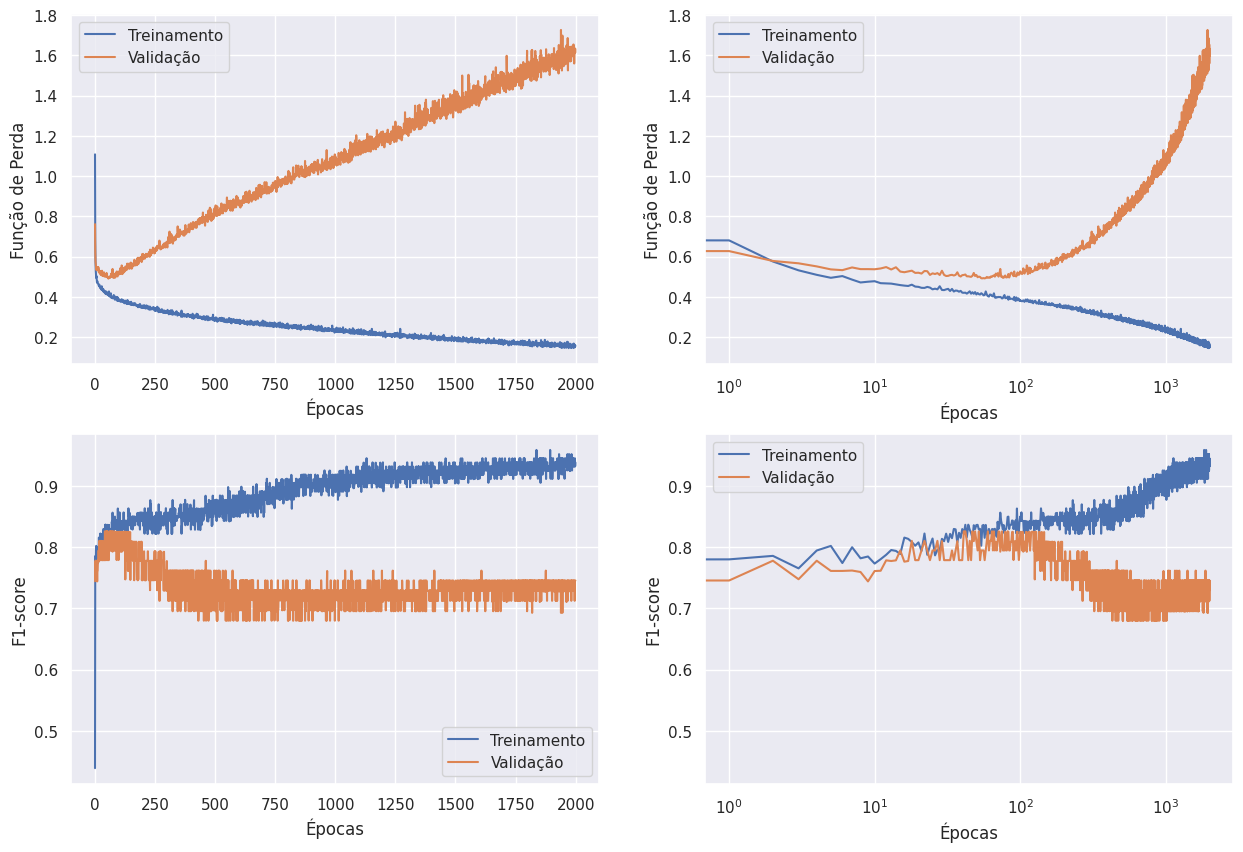

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'Treinamento')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda');
plt.legend(loc = 'best');

plt.subplot(2,2,2)
plt.plot(history.history['loss'], label = 'Treinamento')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda');
plt.legend(loc = 'best');
plt.xscale('log');

plt.subplot(2,2,3)
plt.plot(history.history['f1_score'], label = 'Treinamento')
plt.plot(history.history['val_f1_score'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('F1-score');
plt.legend(loc = 'best');

plt.subplot(2,2,4)
plt.plot(history.history['f1_score'], label = 'Treinamento')
plt.plot(history.history['val_f1_score'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('F1-score');
plt.legend(loc = 'best');
plt.xscale('log');

Pelos gráficos acima, pode-se perceber que as métricas de avaliação têm comportamentos diferentes nos conjuntos de treinamento e validação.

No **conjunto de treinamento**, há uma tendência de melhoria das métricas à medida que o número de épocas cresce.

Já no **conjunto de validação**, essa tendência de melhoria para de ocorrer por volta de 100 épocas. A partir desse ponto, os resultados passam indicar uma tendência de piora do modelo.

Essa eventual divergência nas curvas referentes aos conjuntos de treinamento e validação é um "sintoma" clássico de *overfitting*. Quando o desempenho do modelo passa a piorar nos dados de validação enquanto ainda melhora nos dados de treinamento, tem-se que o modelo está se especializando para o conjunto de treinamento e perdendo capacidade de generalização para dados ainda não vistos.

Em geral, é uma boa prática interromper o treinamento do modelo quando essa divergência inicia.

## *Early stopping*

Dada a problemática acima, uma pergunta natural que pode surgir é se é possível identificar sistematicamente quando o processo de treinamento de uma rede neural pode ser interrompido para se obter um modelo de qualidade e generalizável.

Uma heurística comum para isso é chamada de *early stopping*. A ideia dessa heurística consiste em "monitorar" o comportamento da função de custo **nos dados de validação** e parar o processo de treinamento quando melhorias pararem de ser identificadas.

`Keras` permite utilizar [*early stopping*](https://keras.io/api/callbacks/early_stopping/) utilizando uma funcionalidade chamada *callback*.

A ideia é apresentada no código abaixo. Basicamente, durante o treinamento, temos que:
- A função de custo no conjunto de validação será monitorada (`monitor='val_loss'`);
- O monitor só atuará a partir da época 50. Esse valor pode ser configurado de forma diferente utilizando o parâmetro `start_from_epoch`.
- O treinamento será interrompido quando melhorias pararem de ser observadas em 20 épocas consecutivas. Esse valor pode ser modificado com o parâmetro `patience`.
- Por fim, quando o treinamento for interrompido (ou o máximo de épocas for exaurido), a rede retornada será aquela com os pesos que retornarem o menor valor da função de custo no conjunto de validação, ou seja, a melhor que foi obtida no treinamento.

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           start_from_epoch = 50,
                                           restore_best_weights = True,
                                           patience = 20)

In [ ]:
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((2,)),                                 # camada de entrada
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 1
    keras.layers.Dense(units = 100, activation = "relu",),    # camada oculta 2
    keras.layers.Dense(units = 3, activation = "softmax")]    # camada de saída
)

# configuração
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted')
    ]
)

Para associar o *callback* ao processo de treinamento, é necessário configurar o parâmetro `callback` do método `fit`, como ilustrado a seguir.

Com isso, o processo de treinamento será monitorado e, caso os critérios estabelecidos na variável `early_stop` sejam atendidos, o processo de treinamento será interrompido.

In [ ]:
history = model.fit(X_train2, y_train2_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 2000, verbose = 2, batch_size=32, callbacks = [early_stop]);

Epoch 1/2000
5/5 - 1s - 290ms/step - f1_score: 0.6478 - loss: 0.8035 - val_f1_score: 0.7622 - val_loss: 0.6605
Epoch 2/2000
5/5 - 0s - 82ms/step - f1_score: 0.7611 - loss: 0.5862 - val_f1_score: 0.7595 - val_loss: 0.5817
Epoch 3/2000
5/5 - 0s - 67ms/step - f1_score: 0.7878 - loss: 0.5361 - val_f1_score: 0.7595 - val_loss: 0.5627
Epoch 4/2000
5/5 - 0s - 21ms/step - f1_score: 0.7786 - loss: 0.5126 - val_f1_score: 0.7619 - val_loss: 0.5646
Epoch 5/2000
5/5 - 0s - 31ms/step - f1_score: 0.7740 - loss: 0.5032 - val_f1_score: 0.7457 - val_loss: 0.5538
Epoch 6/2000
5/5 - 0s - 49ms/step - f1_score: 0.8007 - loss: 0.4975 - val_f1_score: 0.7611 - val_loss: 0.5494
Epoch 7/2000
5/5 - 0s - 27ms/step - f1_score: 0.7952 - loss: 0.4828 - val_f1_score: 0.7595 - val_loss: 0.5353
Epoch 8/2000
5/5 - 0s - 21ms/step - f1_score: 0.7722 - loss: 0.4789 - val_f1_score: 0.7595 - val_loss: 0.5362
Epoch 9/2000
5/5 - 0s - 28ms/step - f1_score: 0.7876 - loss: 0.4712 - val_f1_score: 0.7595 - val_loss: 0.5358
Epoch 10/

Pode-se perceber que a execução do método `fit` foi bem mais rápida. Isso se deve ao fato de que poucas épocas foram executadas. Veja abaixo:

In [ ]:
len(history.history['val_loss'])

92

Agora, observando os gráficos abaixo, pose-se perceber que o treinamento foi interrompido quando o desempenho do modelo começou a deteriorar no conjunto de validação.

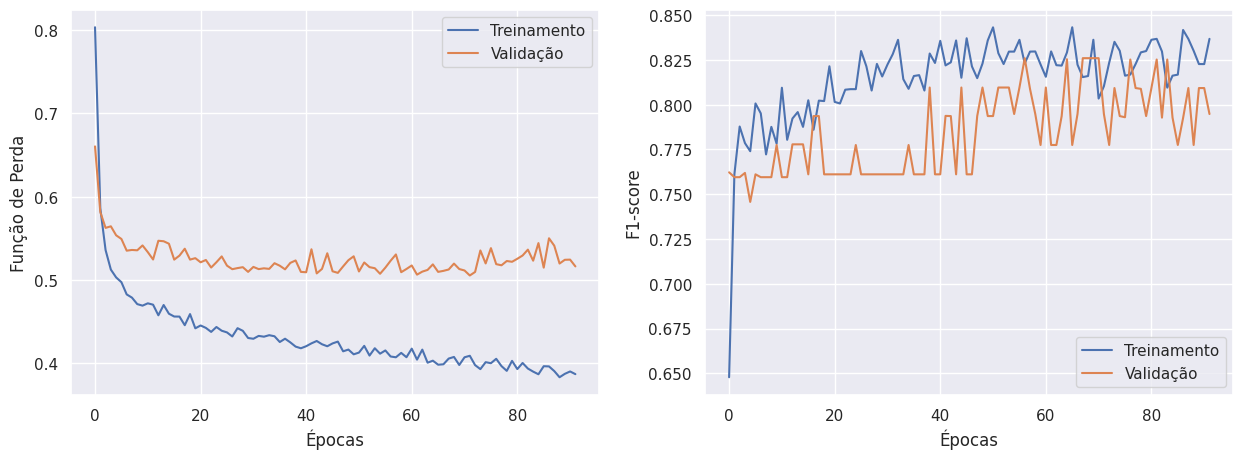

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Treinamento')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda');
plt.legend(loc = 'best');


plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label = 'Treinamento')
plt.plot(history.history['val_f1_score'], label = 'Validação')
plt.xlabel('Épocas')
plt.ylabel('F1-score');
plt.legend(loc = 'best');



Utilizar a heurística de *early stopping* é uma boa prática no treinamento de redes neurais. No entanto, é necessário ter atenção ao configurar os parâmetros da heurística para que o treinamento não seja interrompido de forma prematura.

Ou seja, é necessário ter cuidado para não se gerar *underfitting* na tentativa de se evitar *overfitting*.

## Regularização

No contexto de aprendizado de máquina e redes neurais, técnicas de regulação são utilizadas, durante o treinamento, para diminuir o erro de generalização do modelo. Em outras palavras, são utilizadas para se evitar o problema de *overfitting*.

A ideia é que para um dados conjunto de treinamento $D$ e uma arquitetura de rede definida, pode haver muitas configurações de parâmetros $\mathbf{\theta}$ resultantes de um processo de treinamento.

Dadas essas muitas configurações distintas e com métricas de avaliação similares no conjunto de treinamento, uma heurística é escolher a configuração mais "simples", com o intuito de que ela seja capaz de generalizar para situações mais diversas.

### Regularização L2

Uma das formas mais clássicas dessa técnica é conhecida como Regularização L2.

De aulas passadas, vimos que o treinamento de uma MLP consiste, na verdade, da resolução do seguinte problema de otimização:

$$\underset{\mathbf{\theta}}{\operatorname{arg min}}\sum_{i = 1}^n{L}(y_i, \phi(\mathbf{x}_i; \mathbf{\theta})).$$

Ou seja, queremos encontrar os parâmetros que retornem a menor soma das perdas.

Para incorporar a Regularização L2, a esse problema de otimização é adicionado um novo termo (comumente chamado de **termo de regularização**. Assim, o objetivo é encontrar:

$$\underset{\mathbf{\theta}}{\operatorname{arg min}}\sum_{i = 1}^n\left\{{L}(y_i, \phi(\mathbf{x}_i; \mathbf{\theta})) + \alpha \Vert\mathbf{\theta}\Vert^2\right\}.$$

Onde:
- $\Vert\mathbf{\theta}\Vert$ é a norma do vetor $\mathbf{\theta}$, ou seja $\Vert\mathbf{\theta}\Vert = \sqrt{\sum_i\theta_i^2}$.
- $\alpha > 0$ controla a importância do termo de regularização. $\alpha$ é um hiperparâmetro e deve ser escolhido com alguma técnica de validação cruzada.


A ideia da Regularização L2 é, assim como na versão não regularizada, minimizar a função de custo, mas mantendo os valores das componentes do vetor $\mathbf{\theta}$ pequenas (i.e., "simples"). Essa restrição, reduz o espaço de busca e tende a contribuir para a capacidade de generalização do modelo obtido.

Em `Keras`, a Regularização L2 deve ser configurada por camadas. Há várias formas de se configurar como a regularização será aplicada. Os detalhes podem ser consultados na [documentação da biblioteca](https://keras.io/api/layers/regularizers/). No escopo dessa disciplina, vale mencionar dois tipos:
- `bias_regularizer` - aplicada apenas aos parâmetros relativos aos vieses da camada (vetor $\mathbf{b}$);
- `kernel_regularizer` - aplicada apenas aos parâmetros relativos aos pesos da camada (matriz $\mathbf{W}$).


O código abaixo exemplifica como o uso de regularização L2, em camadas, pode ser feito em `Keras`. Repare que a regularização deve ser informada/configurada na etapa de definição do modelo.

No caso do exemplo abaixo, foi adicionada regularização na camada oculta e na camada de saída da MLP.



In [ ]:
from tensorflow import keras

# definição do modelo e dos regularizadores
regularizer = keras.regularizers.L2(l2 = 0.01) # O parâmetro l2 aqui é equivalente ao alpha
model = keras.Sequential([
    keras.layers.Input((2,)),
    keras.layers.Dense(units = 100, activation = "relu", kernel_regularizer = regularizer, bias_regularizer = regularizer),
    keras.layers.Dense(units = 3, activation = "softmax", kernel_regularizer = regularizer, bias_regularizer = regularizer)]
)

### *Dropout*

Uma outra técnica de regularização popular em redes neurais (especialmente para redes neurais profundas - aquelas com várias camadas ocultas) é conhecida como *dropout*.

O funcionamento é simples! **A cada passo do treinamento**, i.e., a cada *batch* sendo processado, uma fração $p$ de unidades da rede é aleatoriamente selecionada. Essas unidades selecionadas, então, são "desativadas" nessa iteração, tendo suas saídas modificadas para zero.

Na fase de inferência, ou seja, quando o modelo treinado for utilizado para classificação ou regressão, **todas** as unidades da rede são utilizadas. Ou seja, é importante ressaltar que a técnica de *dropout* só é utilizada **durante o treinamento** da rede.

A intuição para o uso de *dropout* é que "desativando" unidades aleatoriamente durante o treinamento evita-se que unidades específicas se especializem para determinadas entradas/características. Com isso, tende-se a aumentar a capacidade de generalização do modelo.

Em `Keras`, *dropout*, assim como a Regularização L2, deve ser configurado por camadas. Para cada camada, a fração $p$ (fração de unidades da camada a ser desativada) deve ser informada. Nesse caso, $p$ também é um hiperparâmetro.

O código abaixo exemplifica como o uso de *dropout*, em camadas, pode ser feito em `Keras`. Repare que a regularização deve ser informada/configurada na etapa de definição do modelo. Mais detalhes podem ser consultados na [documentação](https://keras.io/api/layers/regularization_layers/dropout/) da biblioteca.

No caso do exemplo, *dropout* foi adicionado à camada oculta do modelo, com $p = 0.2$.


In [ ]:
from tensorflow import keras

# definição do modelo e dos regularizadores
model = keras.Sequential([
    keras.layers.Input((2,)),
    keras.layers.Dense(units = 100, activation = "relu"),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(units = 3, activation = "softmax")]
)

## Outros otimizadores importantes



Vimos nessa aula e em aulas passadas vários conceitos e técnicas relacionados ao treinamento de uma rede neural.

Apesar disso, é importante enfatizar que há muito mais na literatura! Por uma questão de tempo e escopo, não podemos passar por tudo nessa disciplina.

Em especial, além do SGD, há na literatura vários outros algoritmos utilizados para se encontrar os parâmetros de uma rede neural. A [documentação](https://keras.io/api/optimizers/) da biblioteca `Keras` traz uma lista dos mais populares e utilizados.

É recomendados aos interessados, principalmente aos que tiverem interesse em se especializar no treinamento de Redes Neurais Profundas, que se familiarizem com esses otimizadores e com conceitos relacionados (e.g., [momento](https://keras.io/api/optimizers/sgd/) e [taxa de aprendizado variável](https://keras.io/api/optimizers/learning_rate_schedules/learning_rate_schedule/#learningrateschedule-class)).
